## Project Description

#This project aims to build and deploy a binary-classification model for predicting individuals, who either exhibit early stages of diabetes or are at risk of developing diabetes, based off some signs and symptoms. Dataset was downloaded from Kaggle and encompasses diverse information, ranging from demographic details to specific symptoms associated with diabetes. Listed below are the information and symptoms:

##### Age (1-20 to 65): Age range of the individuals. 

##### Sex (1. Male, 0. Female): Gender information.

##### Polyuria (1. Yes, 0. No): Presence of excessive urination.

##### Polydipsia (1. Yes, 0. No): Excessive thirst.

##### Sudden Weight Loss (1. Yes, 0. No): Abrupt weight loss.

##### Weakness (1. Yes, 0. No): Generalized weakness.

##### Polyphagia (1. Yes, 0. No): Excessive hunger.

##### Genital Thrush (1. Yes, 0. No): Presence of genital thrush.

##### Visual Blurring (1. Yes, 0. No): Blurring of vision.

##### Itching (1. Yes, 0. No): Presence of itching.

##### Irritability (1. Yes, 0. No): Display of irritability.

##### Delayed Healing (1. Yes, 0. No): Delayed wound healing.

##### Partial Paresis (1. Yes, 0. No): Partial loss of voluntary movement.

##### Muscle Stiffness (1. Yes, 0. No): Presence of muscle stiffness.

##### Alopecia (1. Yes, 0. No): Hair loss.

##### Obesity (1. Yes, 0. No): Presence of obesity.

##### Class (1. Positive, 0. Negative): Diabetes classification.

### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\emman\\ML-deployment\\Captsone project\\diabetes_risk_prediction_dataset.csv")

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


##### change the columns and data to lowercase

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [6]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
for c in categorical_columns:
    df[c] = df[c].str.lower()

In [8]:
df.sample(5).T                   # sample of 10 selected random data

,209,432,133,476,254
age,43,52,16,43,35
gender,male,male,male,male,female
polyuria,no,yes,yes,no,yes
polydipsia,no,yes,no,no,yes
sudden_weight_loss,yes,yes,yes,no,no
weakness,no,yes,no,yes,yes
polyphagia,no,yes,yes,no,no
genital_thrush,yes,no,no,yes,no
visual_blurring,no,yes,no,no,yes
itching,no,yes,no,yes,no


In [9]:
df.isnull().sum()               #check missing data in the dataframe

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [10]:
df.info()                   #full information about our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

In [11]:
df.describe()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


#### Change the class label from positive or negative to either 1 or 0

In [12]:
df['class'].value_counts(), df['class'].unique()

(class
 positive    320
 negative    200
 Name: count, dtype: int64,
 array(['positive', 'negative'], dtype=object))

In [13]:
df['class'] = (df['class'] == 'positive').astype(int)

In [14]:
df.sample(7)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
158,56,male,yes,no,yes,yes,no,yes,no,yes,yes,no,no,no,yes,no,1
381,53,male,yes,no,yes,no,no,no,no,no,no,yes,yes,no,no,no,1
178,50,female,no,yes,no,yes,yes,no,yes,yes,yes,yes,yes,yes,no,no,1
417,39,female,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,no,no,1
492,64,male,no,no,no,yes,yes,no,yes,yes,yes,yes,no,yes,yes,no,0
147,38,male,yes,no,no,no,no,yes,no,yes,no,no,no,yes,no,yes,1
252,39,female,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,no,no,1


### Data Visualization and Interpretation

C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

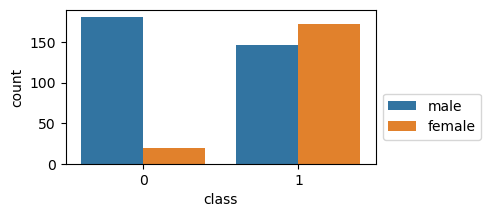

In [15]:
plt.figure(figsize=(4,2))
sns.countplot(data=df,x='class',hue='gender')
plt.legend(bbox_to_anchor=(1,0.5))

##### The above countplot indicates that the female gender is likely to exhibit early stages or at risk of developing diabetes

C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\emman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

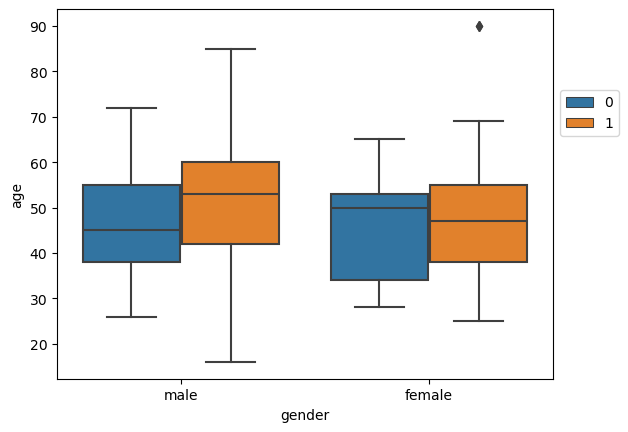

In [16]:
sns.boxplot(data=df, x='gender', y='age', hue='class')
plt.legend(bbox_to_anchor=(1,0.8))

##### The above boxplot indicates that men between the ages of 50-60 (older men) are at risk of being diabetic than much younger men, while younger female between 40-50 risk diabetes than female above 50.

### Setting Up The Validation Framework

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)   #test_size=0.2, which is the 20% of full dataset

In [19]:
len(df_full_train), len(df_test)

(416, 104)

In [20]:
# get the train_test and validation_test: 20% of df_val of the 80% of df_train = 0.25 == 20/80 == 1/4

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)          #the actual lengths of each split dataframes

(312, 104, 104)

In [22]:
df_train = df_train.reset_index(drop=True)                                     #shuffle the indexes of each dataframe:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train['class'].values                    # target values for each dataframe in numpy array
y_val = df_val['class'].values
y_test = df_test['class'].values

In [24]:
del df_train['class']             
del df_val['class']               
del df_test['class']              

### Exploratory Data Analysis (EDA)

In [25]:
# we use the df_full_train for EDA

df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train.isnull().sum()         # no missing values

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [27]:
df_full_train['class'].value_counts(), df_full_train['class'].value_counts(normalize=True)    

(class
 1    254
 0    162
 Name: count, dtype: int64,
 class
 1    0.610577
 0    0.389423
 Name: proportion, dtype: float64)

##### Normalize gives a 61% of positive early stage of diabetes than 39% negative.

In [28]:
risk_rate = df_full_train['class'].mean()     
risk_rate, round(risk_rate, 2)                           

(0.6105769230769231, 0.61)

##### get numerical and categorical variables from dataframe df

In [29]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [30]:
categorical_variables = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss','weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
                         'itching', 'irritability', 'delayed_healing', 'partial_paresis','muscle_stiffness', 'alopecia', 'obesity']

In [45]:
numerical_variables = ['age']

### Feature Importance: Diabetic Risk Rate and Risk Ratio

In [31]:
risk_female = df_full_train[df_full_train['gender'] == 'female']['class'].mean()         # %females at risk of diabetes
risk_female

0.8831168831168831

In [32]:
risk_rate - risk_female

-0.27253996003995995

In [33]:
risk_female / risk_rate         # risk-ratio > 1 shows more risk of early stage diabetes among females

1.446364658963084

In [34]:
risk_male = df_full_train[df_full_train['gender'] == 'male']['class'].mean()            # % of males at risk of diabetes
risk_male

0.45038167938931295

In [35]:
risk_male / risk_rate          # risk-ratio < 1 shows less risk of early stage diabetes among males

0.737632986716355

##### using groupby method to make a dataframe combined with the risk ratio

In [36]:
df_groupby = df_full_train.groupby('gender')['class'].agg(['mean','count'])
df_groupby

,mean,count
gender,,
female,0.883117,154
male,0.450382,262


In [37]:
df_groupby['diff'] = df_groupby['mean'] - risk_rate
df_groupby['risk'] = df_groupby['mean'] / risk_rate
df_groupby

,mean,count,diff,risk
gender,,,,
female,0.883117,154,0.272540,1.446365
male,0.450382,262,-0.160195,0.737633


In [38]:
from IPython.display import display

In [39]:
for c in categorical_variables:
    print(c)
    df_groupby = df_full_train.groupby(c)['class'].agg(['mean','count'])
    df_groupby['diff'] = df_groupby['mean'] - risk_rate
    df_groupby['risk'] = df_groupby['mean'] / risk_rate
    display(df_groupby)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.883117,154,0.272540,1.446365
male,0.450382,262,-0.160195,0.737633




polyuria


,mean,count,diff,risk
polyuria,,,,
no,0.283654,208,-0.326923,0.464567
yes,0.937500,208,0.326923,1.535433




polydipsia


,mean,count,diff,risk
polydipsia,,,,
no,0.321888,233,-0.288689,0.527187
yes,0.978142,183,0.367565,1.601996




sudden_weight_loss


,mean,count,diff,risk
sudden_weight_loss,,,,
no,0.432653,245,-0.177924,0.708597
yes,0.865497,171,0.254920,1.417507




weakness


,mean,count,diff,risk
weakness,,,,
no,0.464706,170,-0.145871,0.761093
yes,0.711382,246,0.100805,1.165098




polyphagia


,mean,count,diff,risk
polyphagia,,,,
no,0.449782,229,-0.160795,0.736650
yes,0.807487,187,0.196910,1.322498




genital_thrush


,mean,count,diff,risk
genital_thrush,,,,
no,0.580442,317,-0.030135,0.950645
yes,0.707071,99,0.096494,1.158037




visual_blurring


,mean,count,diff,risk
visual_blurring,,,,
no,0.50211,237,-0.108467,0.822353
yes,0.75419,179,0.143613,1.235209




itching


,mean,count,diff,risk
itching,,,,
no,0.617512,217,0.006935,1.011357
yes,0.603015,199,-0.007562,0.987615




irritability


,mean,count,diff,risk
irritability,,,,
no,0.527331,311,-0.083246,0.863661
yes,0.857143,105,0.246566,1.403825




delayed_healing


,mean,count,diff,risk
delayed_healing,,,,
no,0.591928,223,-0.018649,0.969457
yes,0.632124,193,0.021547,1.035290




partial_paresis


,mean,count,diff,risk
partial_paresis,,,,
no,0.425532,235,-0.185045,0.696934
yes,0.850829,181,0.240252,1.393483




muscle_stiffness


,mean,count,diff,risk
muscle_stiffness,,,,
no,0.565056,269,-0.045521,0.925446
yes,0.693878,147,0.083301,1.136429




alopecia


,mean,count,diff,risk
alopecia,,,,
no,0.706320,269,0.095743,1.156807
yes,0.435374,147,-0.175203,0.713054




obesity


,mean,count,diff,risk
obesity,,,,
no,0.596542,347,-0.014035,0.977013
yes,0.681159,69,0.070582,1.115600


### Feature Importance: Mutual Information and Correlation

In [40]:
from sklearn.metrics import mutual_info_score

In [41]:
mutual_info = df_full_train[categorical_variables].apply(lambda categorical_variables : mutual_info_score(df_full_train['class'], categorical_variables))
mutual_info

gender                0.101529
polyuria              0.253408
polydipsia            0.270318
sudden_weight_loss    0.103315
weakness              0.030905
polyphagia            0.069511
genital_thrush        0.006283
visual_blurring       0.033635
itching               0.000110
irritability          0.047898
delayed_healing       0.000846
partial_paresis       0.099924
muscle_stiffness      0.008105
alopecia              0.035033
obesity               0.002128
dtype: float64

In [42]:
#sort the categorical_variables in ascending order to know from the most important feature to least important feature.

mutual_info.sort_values(ascending=False)

polydipsia            0.270318
polyuria              0.253408
sudden_weight_loss    0.103315
gender                0.101529
partial_paresis       0.099924
polyphagia            0.069511
irritability          0.047898
alopecia              0.035033
visual_blurring       0.033635
weakness              0.030905
muscle_stiffness      0.008105
genital_thrush        0.006283
obesity               0.002128
delayed_healing       0.000846
itching               0.000110
dtype: float64

In [46]:
df_full_train[numerical_variables].corrwith(df_full_train['class'])

age    0.145186
dtype: float64

#### testing early-stage diabetics risk with different variables

In [47]:
# someone above the age of 50 has a 66% risk of being diabetic

df_full_train[df_full_train['age'] > 50]['class'].mean()

0.6585365853658537

In [48]:
# someone with sudden weight loss and no weakness has a 72% risk of being diabetic

df_full_train[(df_full_train['sudden_weight_loss'] == 'yes') & (df_full_train['weakness'] == 'no')]['class'].mean()

0.7209302325581395

In [49]:
# a male less than or equal to 40 has a 32% risk of being diabetic

df_full_train[(df_full_train['gender'] == 'male') & (df_full_train['age'] <= 40)]['class'].mean()

0.32

In [50]:
# a female less than or equal to 40 has a 88% risk of being diabetic

df_full_train[(df_full_train['gender'] == 'female') & (df_full_train['age'] <= 40)]['class'].mean()

0.8793103448275862

### One-Hot Encoding

In [51]:
from sklearn.feature_extraction import DictVectorizer

In [52]:
dv = DictVectorizer(sparse=False)

In [53]:
train_dicts = df_train[categorical_variables + numerical_variables].to_dict(orient='records')

In [54]:
X_train = dv.fit_transform(train_dicts)             #the feature matrix for the training dataset
X_train

array([[35.,  1.,  0., ...,  0.,  0.,  1.],
       [58.,  1.,  0., ...,  0.,  1.,  0.],
       [68.,  0.,  1., ...,  1.,  1.,  0.],
       ...,
       [53.,  0.,  1., ...,  1.,  0.,  1.],
       [48.,  1.,  0., ...,  1.,  0.,  1.],
       [53.,  0.,  1., ...,  1.,  0.,  1.]])

In [55]:
dv.get_feature_names_out()

array(['age', 'alopecia=no', 'alopecia=yes', 'delayed_healing=no',
       'delayed_healing=yes', 'gender=female', 'gender=male',
       'genital_thrush=no', 'genital_thrush=yes', 'irritability=no',
       'irritability=yes', 'itching=no', 'itching=yes',
       'muscle_stiffness=no', 'muscle_stiffness=yes', 'obesity=no',
       'obesity=yes', 'partial_paresis=no', 'partial_paresis=yes',
       'polydipsia=no', 'polydipsia=yes', 'polyphagia=no',
       'polyphagia=yes', 'polyuria=no', 'polyuria=yes',
       'sudden_weight_loss=no', 'sudden_weight_loss=yes',
       'visual_blurring=no', 'visual_blurring=yes', 'weakness=no',
       'weakness=yes'], dtype=object)

In [56]:
val_dicts = df_val[categorical_variables + numerical_variables].to_dict(orient='records')                        

In [57]:
X_val = dv.transform(val_dicts)             #the feature matrix for the validation dataset
X_val

array([[42.,  0.,  1., ...,  0.,  1.,  0.],
       [27.,  1.,  0., ...,  0.,  1.,  0.],
       [34.,  1.,  0., ...,  0.,  1.,  0.],
       ...,
       [38.,  1.,  0., ...,  0.,  1.,  0.],
       [43.,  1.,  0., ...,  1.,  0.,  1.],
       [67.,  0.,  1., ...,  1.,  0.,  1.]])

### Training Logistic Regression with Scikit-Learn

In [58]:
from sklearn.linear_model import LogisticRegression           

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# get the first element weights(coefficients):

model.coef_.round(3)[0]

array([-0.037,  0.357,  0.099,  0.502, -0.045,  1.473, -1.017, -0.535,
        0.991, -0.562,  1.019,  0.741, -0.284,  0.376,  0.081,  0.611,
       -0.154, -0.39 ,  0.847, -1.274,  1.73 , -0.273,  0.73 , -1.132,
        1.588, -0.228,  0.685, -0.012,  0.469,  0.086,  0.371])

In [61]:
#get the bias of first element

model.intercept_[0].round(3)

1.485

In [62]:
#soft predictions with validation dataset: we are interested in the second column probability

y_pred = model.predict_proba(X_val)[:,1]

In [63]:
#set a threshold at >= 0.5 for individuals at risk of diabetes

diabetes_risk_decision = (y_pred >= 0.5)
diabetes_risk_decision

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True,  True])

In [64]:
#compare outcomes between y_val and diabetes risk decision:

y_val, diabetes_risk_decision.astype(int)

(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]))

In [65]:
#test the accurary of our model:

(y_val == diabetes_risk_decision).mean()

0.9230769230769231

In [66]:
#combine all into a dataframe:

df_pred = pd.DataFrame({'probability':y_pred, 'predictions':diabetes_risk_decision, 'actual':y_val,
                        'correct':(y_val==diabetes_risk_decision)})

In [67]:
df_pred

,probability,predictions,actual,correct
0,0.044635,False,0,True
1,0.094850,False,0,True
2,0.074987,False,0,True
3,0.999763,True,1,True
4,0.991414,True,1,True
...,...,...,...,...
99,0.988988,True,1,True
100,0.367455,False,0,True
101,0.065426,False,0,True
102,0.999734,True,1,True


In [68]:
#get the accuracy from the correct column: it shows the model is 92% correct.
df_pred['correct'].mean()

0.9230769230769231

In [69]:
# assign the feature names with the coefficients.

dict(zip(dv.get_feature_names_out(), model.coef_.round(3)[0]))

{'age': -0.037,
 'alopecia=no': 0.357,
 'alopecia=yes': 0.099,
 'delayed_healing=no': 0.502,
 'delayed_healing=yes': -0.045,
 'gender=female': 1.473,
 'gender=male': -1.017,
 'genital_thrush=no': -0.535,
 'genital_thrush=yes': 0.991,
 'irritability=no': -0.562,
 'irritability=yes': 1.019,
 'itching=no': 0.741,
 'itching=yes': -0.284,
 'muscle_stiffness=no': 0.376,
 'muscle_stiffness=yes': 0.081,
 'obesity=no': 0.611,
 'obesity=yes': -0.154,
 'partial_paresis=no': -0.39,
 'partial_paresis=yes': 0.847,
 'polydipsia=no': -1.274,
 'polydipsia=yes': 1.73,
 'polyphagia=no': -0.273,
 'polyphagia=yes': 0.73,
 'polyuria=no': -1.132,
 'polyuria=yes': 1.588,
 'sudden_weight_loss=no': -0.228,
 'sudden_weight_loss=yes': 0.685,
 'visual_blurring=no': -0.012,
 'visual_blurring=yes': 0.469,
 'weakness=no': 0.086,
 'weakness=yes': 0.371}

### Using the Model on the Test Dataset

In [70]:
dicts_full_train = df_full_train[categorical_variables + numerical_variables].to_dict(orient = 'records')

In [71]:
dv = DictVectorizer(sparse=False)

In [72]:
X_full_train = dv.fit_transform(dicts_full_train) 

In [73]:
y_full_train = df_full_train['class'].values

In [74]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
#apply the same process to our test data:

dicts_test = df_test[categorical_variables + numerical_variables].to_dict(orient = 'records')

In [76]:
X_test = dv.transform(dicts_test) 

In [77]:
y_pred = model.predict_proba(X_test)[:,1]             

In [78]:
diabetes_risk_decision = (y_pred >= 0.5)             # likely to be diabetic

In [79]:
(diabetes_risk_decision == y_test).mean()                      #check accuracy of our model

0.9423076923076923

### Diabetic risk of a Random Patient

In [80]:
patient = dicts_test[20]
patient

{'gender': 'male',
 'polyuria': 'yes',
 'polydipsia': 'yes',
 'sudden_weight_loss': 'no',
 'weakness': 'yes',
 'polyphagia': 'no',
 'genital_thrush': 'yes',
 'visual_blurring': 'yes',
 'itching': 'yes',
 'irritability': 'no',
 'delayed_healing': 'no',
 'partial_paresis': 'no',
 'muscle_stiffness': 'no',
 'alopecia': 'no',
 'obesity': 'no',
 'age': 48}

In [81]:
X_patient = dv.transform(patient)

In [82]:
model.predict_proba(X_patient)[0,1]          # this predicts the patient has a high probability risk of being diabetic

0.9854729275005114

In [83]:
y_test[20]                          # this patient was confirmed actual diabetic

1

In [84]:
patient_10 = dicts_test[-10]
patient_10

{'gender': 'male',
 'polyuria': 'no',
 'polydipsia': 'no',
 'sudden_weight_loss': 'no',
 'weakness': 'yes',
 'polyphagia': 'no',
 'genital_thrush': 'yes',
 'visual_blurring': 'no',
 'itching': 'yes',
 'irritability': 'no',
 'delayed_healing': 'yes',
 'partial_paresis': 'no',
 'muscle_stiffness': 'no',
 'alopecia': 'yes',
 'obesity': 'no',
 'age': 61}

In [85]:
X_patient_10 = dv.transform(patient_10)

In [86]:
model.predict_proba(X_patient_10)[0,1]       # this predicts the patient has a low probability risk of being diabetic

0.017439289859902396

In [87]:
y_test[-10]                             # this patient has no early stage of diabetes

0

### Using scikit-learn to get Accuracy, Precision, Recall, False Positive, True Positive, False Negative, True Negative and AUC Score

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [89]:
print(classification_report(y_test, diabetes_risk_decision))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



In [90]:
confusion_matrix(y_test, diabetes_risk_decision)

array([[36,  2],
       [ 4, 62]], dtype=int64)

In [135]:
norm = (confusion_matrix(y_test, diabetes_risk_decision) / confusion_matrix(y_test, diabetes_risk_decision).sum()).round(2)
norm

array([[0.35, 0.02],
       [0.04, 0.6 ]])

In [92]:
roc_auc_score(y_test, diabetes_risk_decision)

0.9433811802232857

###### from the above, we can deduce our model did greatly with auc_score = 94%, accuracy = 94%, precision = 97%, True positive = 60%, True negative = 35%, False positive = 2% and False negative = 4%  

### Cross Validation using KFold

In [93]:
#create a function for train dataset and logistic regression model

def train(df_train, y_train):
    dicts = df_train[categorical_variables + numerical_variables].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return dv, model

In [94]:
dv, model = train(df_train, y_train)

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
#create a function for prediction:

def predict(df, dv, model):
    dicts = df[categorical_variables + numerical_variables].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [96]:
y_pred = predict(df_val, dv, model)

In [97]:
#kfolds from model selection: split to 10 folds, shuffle=True, random_state=1.

from sklearn.model_selection import KFold

In [98]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [99]:
#to get the train and val dataframes:

train_idx, val_idx = next(kfold.split(df_full_train))

In [100]:
len(train_idx), len(val_idx), len(df_full_train)

(374, 42, 416)

In [101]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]
df_train.T

,0,1,2,3,7,8,9,10,11,12,...,405,406,408,409,410,411,412,413,414,415
age,28,40,61,34,50,59,66,39,30,38,...,35,30,47,47,58,48,68,65,26,63
gender,male,female,female,female,female,female,male,female,male,male,...,female,male,male,male,male,male,male,female,male,male
polyuria,no,yes,yes,yes,no,no,yes,yes,yes,no,...,yes,no,no,no,no,yes,yes,no,no,yes
polydipsia,no,yes,no,yes,yes,no,no,yes,yes,no,...,yes,no,no,no,no,yes,yes,no,no,yes
sudden_weight_loss,yes,yes,no,no,no,no,yes,yes,yes,no,...,no,no,no,no,no,yes,no,no,no,yes
weakness,no,yes,no,yes,yes,no,no,yes,yes,no,...,yes,no,no,no,yes,yes,no,no,no,yes
polyphagia,no,no,yes,no,yes,no,no,yes,no,no,...,no,no,no,no,no,no,yes,no,no,yes
genital_thrush,no,no,no,no,no,no,yes,no,yes,no,...,no,no,no,no,no,no,no,yes,no,no
visual_blurring,no,yes,no,no,yes,no,no,no,no,no,...,yes,no,no,no,no,no,yes,no,no,yes
itching,no,no,no,no,yes,no,yes,yes,no,no,...,no,no,yes,no,yes,yes,yes,no,no,no


In [102]:
from tqdm.auto import tqdm

In [103]:
#combining all functions above and the kfold.split() method into a loop

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train['class'].values
    y_val = df_val['class'].values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [104]:
scores                           #scores for folds 1-10(ten models)

[0.9901234567901235,
 0.9416445623342176,
 0.9454545454545454,
 0.9576470588235294,
 0.9636363636363637,
 0.9893899204244032,
 0.99,
 0.9473684210526315,
 0.9820512820512821,
 0.9973544973544974]

In [105]:
np.mean(scores), np.std(scores)                #avg.score and std for all 10folds

(0.9704670107921594, 0.020454909029950345)

In [111]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores))) 

0.971 +- 0.016


In [133]:
#add a regularization parameter c to the logistic regression  

#create a function for train dataset and logistic regression model with C and max_iter 

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_variables + numerical_variables].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [134]:

n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train['class'].values
        y_val = df_val['class'].values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores))) 

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.793 +- 0.040
C=0.01 0.949 +- 0.009
C=0.1 0.970 +- 0.012
C=0.5 0.971 +- 0.013
C=1 0.971 +- 0.013
C=5 0.972 +- 0.011
C=10 0.972 +- 0.011


In [132]:
dv, model = train(df_full_train, df_full_train['class'].values, C=10)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)
auc

0.9760765550239234

In [128]:
C = 10
n_splits = 5              #we use the values to save our model below because they gave the highest auc score.